<a href="https://colab.research.google.com/github/PatilTruptiU/EDA-PROJECT---Play-store-Analysis-/blob/main/play_store_data_and_user_reviews_analysis_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let us begin with importing the libraries

In [ ]:
#importing numpy package
import numpy as np
# Import Numpy Package
import pandas as pd 
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Import seaborn
import seaborn as sns

## mounting the drive 

In [ ]:
 from google.colab import drive 
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading csv files
file_path1='/content/drive/MyDrive/Play Store Data.csv'
file_path2='/content/drive/MyDrive/User Reviews.csv'

In [ ]:
#Loading the dataset as a pandas dataframe
play_store_df = pd.read_csv(file_path1)
user_review_df = pd.read_csv(file_path2)

In [ ]:
p_df1 = play_store_df
u_df2 = user_review_df

##**1. Plat store data** 

##**#data information**


In [ ]:
#firstly check shape of  dataframe 
p_df1.shape

(10841, 13)

In [ ]:
# columns info
p_df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
p_df1.columns.str.replace(' ','_')

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

### **note -** 
Given play store dataset has 10841 rows and 13 columns 
  
###**columns information :**

App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app





In [ ]:
#head or the first 10 rows of the dataframe
p_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
p_df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# info method - To find out the data type & non-null count of each column 
p_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##**#Cleaning data**

In [ ]:
#replacing + by '' and ','by ''from Prices column
Installing = [ i for i in p_df1['Installs']]
def clean_Installing(Installing_list):
  cleaned_data = []
  for Installs in Installing_list:
    if '+' in Installs:
      Installs = Installs.replace('+','')
    if ',' in Installs:
      Installs = Installs.replace(',','')
    cleaned_data.append(Installs)
  return cleaned_data


In [ ]:
p_df1['Installs'] = clean_Installing(Installing)
p_df1.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [ ]:
p_df1.loc[p_df1['Installs']=='Free']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


here in above row seems that due to the categaory value missing all values are shifted one plce to left.so it's better that we will drop this row from datafram

In [ ]:
p_df1.drop([10472],axis=0,inplace=True)

In [ ]:
p_df1.shape

(10840, 13)

In [ ]:
#Droping null values from the dataset
p_df1.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


here in given data last three colums are not much usefull so we drop it
  

In [ ]:
#let us drop three coumns which are not much useful
p_df= p_df1.drop(['Last Updated','Current Ver','Android Ver'], axis=1)

In [ ]:
p_df.shape

(10840, 10)

In [ ]:
#replacing $ by '' from Prices column
prices = [i for i in p_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

In [ ]:
p_df['Price'] = clean_prices(prices)
p_df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
p_df.shape

(10840, 10)

In [ ]:
# Converting KB to MB form size columns 
p_df['Size'] = p_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
p_df['Size'] = p_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
p_df['Size'] = p_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
p_df['Size'] = p_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
p_df['Size'] = p_df['Size'].apply(lambda x: float(x))

In [ ]:
p_df.dropna(subset=['Size'],inplace = True)
p_df.shape

(9145, 10)

In [ ]:
p_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity


In [ ]:
#checking all values unique values of Category column
p_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   object 
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(2), object(8)
memory usage: 785.9+ KB


here many datatypes are object we will convert it into respective appropriate dtype

In [ ]:
#change the datatype
p_df['Installs'] = p_df['Installs'].astype(float)
p_df['Reviews'] = p_df['Reviews'].astype(float)
p_df['Price'] = p_df['Price'].astype(float)
p_df['Size'] = p_df['Size'].astype(float)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   float64
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   float64
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(5), object(5)
memory usage: 785.9+ KB


In [ ]:
#checking all unique values & count of Type columns
p_df1.Type.unique()
p_df1['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [ ]:
#checking all unique values & count of Type columns
p_df['Content Rating'].unique()
p_df['Content Rating'].value_counts()

Everyone           7416
Teen                987
Mature 17+          406
Everyone 10+        332
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
#checking all unique values & count of Genres columns
p_df['Genres'].unique()
p_df['Genres'].value_counts()

Tools                                739
Entertainment                        537
Education                            496
Medical                              434
Business                             400
                                    ... 
Arcade;Pretend Play                    1
Travel & Local;Action & Adventure      1
Music & Audio;Music & Video            1
Health & Fitness;Education             1
Strategy;Creativity                    1
Name: Genres, Length: 116, dtype: int64

In [ ]:
#checking all unique values of Category columns
p_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
#describe method - It shows statistical summer of columns that has numeric data 
p_df.describe() 

,Rating,Reviews,Size,Installs,Price
count,7729.000000,9.145000e+03,9145.000000,9.145000e+03,9145.000000
mean,4.173852,2.490487e+05,21.516530,7.114842e+06,1.184366
std,0.544563,1.716211e+06,22.588748,4.619357e+07,17.355754
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.200000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,30.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000


In [ ]:
#letus check the shape after dropping which we use for futher analysis
p_df.shape

(9145, 10)

In [ ]:
p_df.isnull().sum()
#this shows how many null values after dropna method

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

##**CONCLUSION:**


after clening and after removing/droing info which complicates the data we have to naote that:
1. we have p_df dataframe with 9145 rows and 10 columns.
2.their are not any single null value excluding rating column
3.maximum datatype is converted into other relevant dataframe. 

In [ ]:
p_df.dropna(subset=['Size'],inplace = True)
p_df.shape

(9145, 10)

In [ ]:
def change_int(x):
  x=x.replace(',','')
  x=x.replace('+','')
  x=x.replace('M','')
  x=x.replace('K','')
  x=x.replace('$','')
  return x

In [ ]:
#p_df['Size']=p_df['Size'].apply(change)
#p_df['Installs']=p_df['Installs'].apply(change_int)
p_df['Reviews']=p_df['Reviews'].apply(change_int)

##**2.user review dataset** 

##**#data information**

In [ ]:
u_df2 = user_review_df

In [ ]:
u_df2.shape

(64295, 5)

**note** - 
In user review dataframe has 64295 rows and 5 columns


In [ ]:
u_df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
u_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


###**note -**
given user review dataset has 64295 rowsand 5 columns

###**columns information**
App - It gives name if application                      
Translated Review - This gives information about what the users feedback is about the application.        
Sentiment - This column shows users reviews are poistive or negative or nutral in words                  
Sentiment_Polarity - This shows sentiment column by value count         
Sentiment_Subjectivity -This shows degree of emotions/sentiments expressed in a given text 

In [ ]:
u_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
u_df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


from above info we understand that their are many NaN values which not much useful so firstly drop that
  

##**#cleaning data**

In [ ]:
u_df1 = u_df2.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [ ]:
u_df1.shape

(37432, 5)

In [ ]:
u_df1.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
u_df = u_df1.dropna(subset=["Translated_Review"])

In [ ]:
u_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
u_df.shape

(37427, 5)

In [ ]:
u_df.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
16028,Block Puzzle,Love game. It annoys little sometimes even I t...,Negative,-0.029167,0.500000
35165,Doctor On Demand,Best doctor visit ever!,Positive,1.000000,0.300000
44687,Farming Simulator 18,I restart game 3 times phone dies I playing I ...,Negative,-0.266667,0.600000
49602,Free Panda Radio Music,It's ok,Positive,0.500000,0.500000
33845,Diabetes:M,I love seems measure Libre sensor much 40% low...,Positive,0.112500,0.572222
55863,Google Keep,On 3 occasions I created multiple notes extend...,Negative,-0.025000,0.200000
50505,Fruits Bomb,Good I love,Positive,0.600000,0.600000
54614,"GolfNow: Tee Time Deals at Golf Courses, Golf GPS",Had reinstall new phone let existing account. ...,Positive,0.213068,0.454545
40640,Equestria Girls,It expensive call mane 6. Can please make 2 di...,Negative,-0.225000,0.506250
28898,Comptia A+ 220-901 & 220-902,Good,Positive,0.700000,0.600000


##**CONCLUSION:**


after clening and removing/droing info which complicates the data we have to naote that:

  1. in the user dataframe nowtheir are 37427rows and 5 columns
  2.Their is not any single null value.

now for futher analysis we will merge/concat the both the dataframes

In [ ]:
p_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
u_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

as their are in both the dataframes app is common column so will marge by using this column

In [ ]:
df = pd.merge(p_df,u_df,how='inner',left_on='App',right_on='App')

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Translated_Review', 'Sentiment',
       'Sentiment_Polarity', 'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df.shape

(45046, 14)

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,I love enjoyable fun,Positive,0.433333,0.466667


In [ ]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
45036,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,"great there's problem, IOS device Sunshine clu...",Positive,0.411111,0.405556
45037,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,I'm really tired little punks that's teen age....,Negative,-0.273438,0.562500
45038,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,Fun easy use. Lots friends. But avakin need mo...,Positive,0.177778,0.411111
45039,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,"The game awesome. But day so, I decided play g...",Positive,0.050000,0.450000
45040,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,This game addicting! It's fun! Some things lit...,Positive,0.094643,0.478571
45041,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
45042,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
45043,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
45044,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000
45045,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,91.0,10000000.0,Free,0.0,Teen,Role Playing,Boring graphics great. Although I praise somew...,Positive,0.060000,0.550000


In [ ]:
ratings_of_app = df.Rating.sort_index()
ratings_of_app

0        3.9
1        3.9
2        3.9
3        3.9
4        3.9
        ... 
45041    4.4
45042    4.4
45043    4.4
45044    4.4
45045    4.4
Name: Rating, Length: 45046, dtype: float64

<Figure size 2880x2160 with 0 Axes>

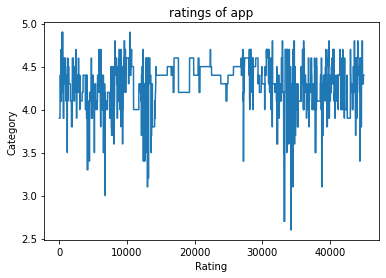

<Figure size 2880x2160 with 0 Axes>

In [ ]:
#tratings of app
#create the polt object
plt.plot(ratings_of_app)
plt.title('ratings of app')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.figure(figsize=(40,30))